주제: '백종원의 3대천왕' 방문자 블로그에서 호불호 단어 출현빈도로 맛집선정 보편성 여부 확인


In [19]:
import requests
import lxml.html
import csv
from urllib.parse import urljoin
def extract(url,path):
    res = requests.get(url)
    res.encoding='cp949'
    root = lxml.html.fromstring(res.text)
    return root.xpath(path)

#daum 블로그 중 '백종원의 3대천왕 방문기'로 검색한 결과 scraping 후 저장
board_url='http://search.daum.net/search?nil_suggest=btn&w=blog&lpp=10&DA=PGD&q=%EB%B0%B1%EC%A2%85%EC%9B%90%EC%9D%98+3%EB%8C%80%EC%B2%9C%EC%99%95+%EB%B0%A9%EB%AC%B8%EA%B8%B0&tltm=1page&m=board&'
subject_path='.//a[@class="f_link_bu"]'

with open('blog.txt','w') as f:
    w=csv.writer(f)
    for page in range(21,25):#1~30page 나눠서 scraping
        page_url=board_url+'page={}'.format(page)
        for link in extract(page_url,subject_path):
            mainText=link.text_content()
            try:
                url=link.attrib['href']
                abs_url=urljoin(board_url,url)
                mainContents=extract(abs_url,'.//div[@id="postViewArea"]/div')[0]
                #print(mainContents.text_content())
                w.writerow(mainContents.text_content())
            except:
                continue


							오늘의 음식 투어는 두곳 인데요한곳은 엄마들 수다모임 으로 닭갈비를 먹으로 왔는데요 유가네 닭갈비 집으로 먹으로 왔답니다. 또하나의 집은 백종원 3대 천왕에 나왔던 마포 원조 떡볶이집을 방문했습니다. 다 같이 고고씽  기본 셋팅 되었있는 밑 반찬들... 원하는 만큼 무한리필  아줌마들 무한데로 먹을수 있다니까 엄청 들이데고 먹었습니다.  음식이 나오기 전에 배가 차서리. 닭갈비 철판 볶음밥을 주문해서 먹었는데 생각보다 맛있었어요. 여성들이 딱 좋아할 만한 맛이네요  역쉬 중독성 있는 맛이네요   싹싹싹 비웠습니다. 어딜가나 늘 깨끗하게 남기지 않구 싹싹 비워야 나라 경제도 살리고   수다도 떨구 해피한 점심 시간 이였답니다. 두번째 맛집 투어  마포 원조 떡볶이 집을 찾아서 요기는 마포역 입니다. 처음 와본 것 같아요. 한가안 오전 시간입니다. TV프로 3대 천왕에 나왔던 바로 그 집 ... 증말 맛있는 집인가 확인차. 제가 달려가 가 봤습니다.  11시쯤에 도착했는데요.  가게는 작아요. 오래 됐구요. 벌써 TV를 보고 먹으러 왔나 안에 사람이 꽉 찼구요 대기 중입니다. 오래 장사를 하셔서 그런지 그리 청결하지는 않은것 같아요. 주방도 좁구  TV에 나온 할머니 그리고 아들로 보이는 요 남자분 .. 옆 할머니는 누군지 모름.. 알차게 일하시네요. 인건비도 많이 안나가고 실속파 주인장님요것은 좀 그러지요. 워낙 가게가 좁다 보니까 놓을데가 없으셔서 손님 자리에 마구 올려 놓으셨네요.  위생 상태를 좀 생각을 하셔야 겠어요. 그래도 정감이 가긴 하네요와우 그 유명 떡볶이가 나왔네요. 1인분 2000원 인데 오뎅은 1인분 천원  양은 많습니다. 그럼 시식해 보겟습니다. 음 맛있는데요. 어딘가 먹어본 어딘가 익숙한 맛 울 가게 근처 안양 중앙시장 떡볶이집들이 줄기차게 있는데 그곳에서 먹엇던  것과 거의  맛이 흡사해요 90% 저는 개인적으로 다시 가서 먹고 싶진 않네요개인적으로 예전에 갔던 부산의 중탕 떡볶이집(이가네 떡볶이집)을 추천하고 싶네요. 3

In [6]:
#저장된 파일을 불러와 단어 목록 추출

import numpy
import operator
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer

f= open('blog.txt','r',encoding='utf8')
blog = f.readlines()
f.close()
        
tagger = Twitter()
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]
cv = CountVectorizer(tokenizer=get_word, max_features=1000)
tdf = cv.fit_transform(blog)
words = cv.get_feature_names()
words

['가게',
 '가격',
 '가기',
 '가끔',
 '가도',
 '가득',
 '가루',
 '가면',
 '가시',
 '가야',
 '가요',
 '가운데',
 '가을',
 '가장',
 '가족',
 '가지',
 '각종',
 '간다',
 '간략',
 '간만',
 '간식',
 '간이',
 '간장',
 '간짜장',
 '간판',
 '갈비',
 '갈비찜',
 '갈비탕',
 '감기',
 '감동',
 '감자',
 '갑자기',
 '강릉',
 '강아지',
 '강원도',
 '강추',
 '개인',
 '개조',
 '거기',
 '거리',
 '거의',
 '건가',
 '건강',
 '건물',
 '검색',
 '겉절이',
 '겨우',
 '겨울',
 '결과',
 '결정',
 '결혼',
 '경기',
 '경기도',
 '경방',
 '경우',
 '계란',
 '계림',
 '계산',
 '계속',
 '계시',
 '계피',
 '계획',
 '고객',
 '고고',
 '고구마',
 '고기',
 '고기국수',
 '고대',
 '고래',
 '고민',
 '고요',
 '고천',
 '고추',
 '고추장',
 '고향',
 '골목',
 '곰탕',
 '곱창',
 '곳도',
 '공간',
 '공기밥',
 '공덕동',
 '공식',
 '공영',
 '공원',
 '공항',
 '공항동',
 '관계',
 '광명',
 '광장',
 '광장시장',
 '광주',
 '교육',
 '교장',
 '구경',
 '구리',
 '구마',
 '구매',
 '구역',
 '구용',
 '구이',
 '구입',
 '국물',
 '국밥',
 '국수',
 '국제',
 '군데',
 '군산',
 '군침',
 '군포',
 '굳이',
 '궁합',
 '귀염둥이',
 '규랭이',
 '그것',
 '그게',
 '그날',
 '그냥',
 '그닥',
 '그대로',
 '그때',
 '그릇',
 '극찬',
 '근대',
 '근처',
 '금방',
 '금요일',
 '기념품',
 '기다림',
 '기대',
 '기도',
 '기름',
 '기본',
 '기분',
 '기억',
 '기준',
 '기회',
 '길거리',
 '길이',
 

In [8]:
#지역,방송,음식명 등 음식 맛과 무관한 단어 제외
import csv

f= open('removeWords.csv','r')
r = f.readlines()
removeWords = list(map(lambda s: s.strip(),r))
f.close()

cleanWords =[words for words in words if words not in removeWords]

['감동',
 '강추',
 '고고',
 '군침',
 '굳이',
 '그냥',
 '그닥',
 '극찬',
 '깜놀',
 '꿀맛',
 '나름',
 '다만',
 '다소',
 '다시',
 '다음',
 '단골',
 '단맛',
 '달달',
 '당근',
 '당분간',
 '당황',
 '대박',
 '던데',
 '마찬가지',
 '만족',
 '만큼',
 '매력',
 '무슨',
 '무조건',
 '미스',
 '바삭',
 '별로',
 '보통',
 '분명',
 '사랑',
 '사실',
 '살짝',
 '새콤',
 '실망',
 '아쉬움',
 '약간',
 '역시',
 '오래',
 '완전',
 '워낙',
 '윤기',
 '은근',
 '이상',
 '이색',
 '인생',
 '일반',
 '일품',
 '자극',
 '자꾸',
 '자주',
 '전혀',
 '절대',
 '정도',
 '제대로',
 '제법',
 '제일',
 '조금',
 '좀더',
 '좔좔',
 '중독',
 '쫄깃',
 '최고',
 '추가',
 '추천',
 '취향',
 '칼칼',
 '크게',
 '후회']

In [10]:
#출현 빈도순으로 단어 정렬
import networkx
from matplotlib import pyplot

count_mat = tdf.sum(axis=0)
count=numpy.squeeze(numpy.asarray(count_mat))
word_count=list(zip(cleanWords,count))
sorted(word_count,key=operator.itemgetter(1),reverse=True)

[('쫄깃', 115),
 ('강추', 76),
 ('단골', 58),
 ('감동', 54),
 ('만큼', 49),
 ('살짝', 39),
 ('제대로', 39),
 ('아쉬움', 33),
 ('다시', 30),
 ('약간', 25),
 ('던데', 24),
 ('완전', 22),
 ('만족', 20),
 ('극찬', 18),
 ('보통', 18),
 ('워낙', 17),
 ('고고', 16),
 ('다음', 16),
 ('실망', 16),
 ('깜놀', 15),
 ('취향', 15),
 ('대박', 13),
 ('절대', 13),
 ('후회', 13),
 ('마찬가지', 12),
 ('매력', 11),
 ('조금', 11),
 ('최고', 11),
 ('칼칼', 11),
 ('그닥', 10),
 ('다소', 10),
 ('별로', 10),
 ('좀더', 10),
 ('그냥', 9),
 ('인생', 9),
 ('자극', 9),
 ('자꾸', 9),
 ('굳이', 8),
 ('꿀맛', 8),
 ('무조건', 8),
 ('역시', 8),
 ('자주', 8),
 ('정도', 8),
 ('제법', 8),
 ('다만', 7),
 ('당분간', 7),
 ('바삭', 7),
 ('은근', 7),
 ('전혀', 7),
 ('단맛', 6),
 ('새콤', 6),
 ('이상', 6),
 ('일품', 6),
 ('좔좔', 6),
 ('중독', 6),
 ('군침', 5),
 ('나름', 5),
 ('달달', 5),
 ('당근', 5),
 ('당황', 5),
 ('무슨', 5),
 ('미스', 5),
 ('분명', 5),
 ('사랑', 5),
 ('사실', 5),
 ('오래', 5),
 ('윤기', 5),
 ('이색', 5),
 ('일반', 5),
 ('제일', 5),
 ('추가', 4),
 ('추천', 4),
 ('크게', 4)]

In [64]:
#단어 긍부정 파일 불러오기. 긍정:+1,부정:-1,중립:0
with open('score.csv','r') as f:
    r = csv.reader(f)
    score = list(r)

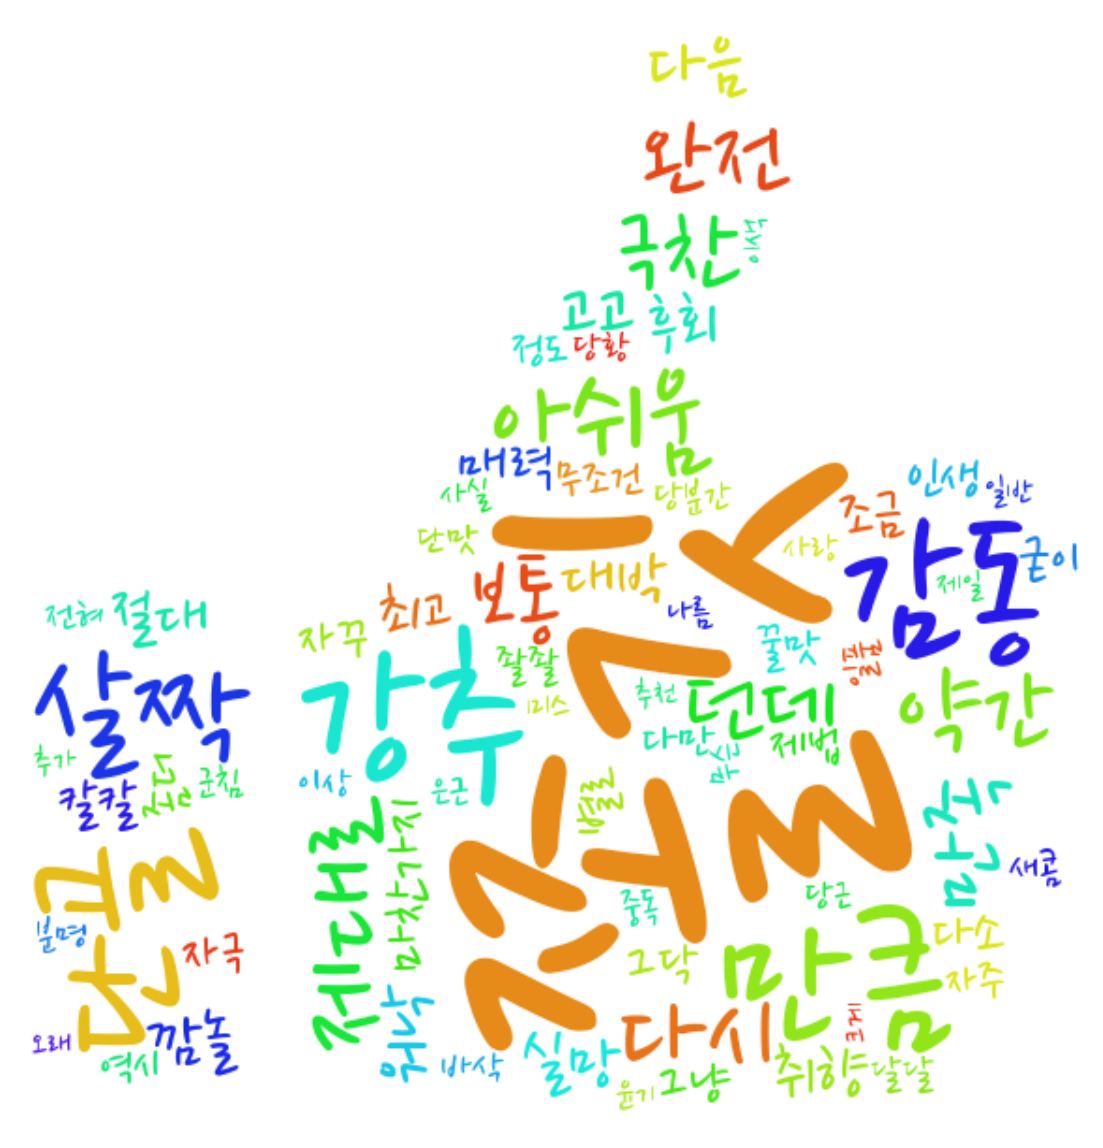

In [115]:
%matplotlib inline
from os import path
from wordcloud import WordCloud, ImageColorGenerator
from scipy.misc import imread
from matplotlib import pyplot

d=path.dirname("__file__")

image_mask = imread(path.join(d,"C://Users/mijin/Desktop/Python/like2.png"))

wc = WordCloud(font_path='C:\\Windows\\Fonts\\NanumPen.ttf', 
               mask=image_mask,background_color='white', width=400, height=300)
image_color = ImageColorGenerator(image_mask)

cloud = wc.generate_from_frequencies(word_count)

pyplot.figure(figsize=(20,20))
pyplot.imshow(cloud)
#pyplot.imshow(cloud.recolor(color_func=image_color))
pyplot.axis("off")
pyplot.show()

In [117]:
#긍부정단어 출현 빈도수 점수화
#Total sum(단어가 차지하는 비율*단어 긍부정 점수)
blog_scored=0

sum_word=0
for i in range(0,len(word_count)):
    sum_word=sum_word+word_count[i][1]
    
for i in range(0,len(word_count)):
    for j in range(0,len(score)):
        if word_count[i][0] == score[j][0]:
            blog_scored=blog_scored+(word_count[i][1]/sum_word)*int(score[j][1])
        else:pass

print("Total Score = ",blog_scored)

Total Score =  0.356363636364


In [137]:
#Total score에 따라 보편성 구간화(4단계)
import numpy as np
a = np.arange(-1,1,0.2)
sep1 = np.percentile(a,25)
sep2 = np.percentile(a,50)
sep3 = np.percentile(a,75)

if blog_scored > sep3:print("맛집선정 보편도:★★★★")
else:
    if blog_scored > sep2:print("맛집선정 보편도:★★★☆")
    elif blog_scored > sep1:print("맛집선정 보편도:★★☆☆")
    else:print("맛집선정 보편도:★☆☆☆")

맛집선정 보편도:★★★★
